In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
###### %autoreload 2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys,os,glob
import pprint
import re
import xarray as xr

## Add own library to path
workdir = os.getcwd()
thismodule = sys.modules[__name__]
moduledir = os.path.join(os.path.dirname(workdir),'functions')
sys.path.insert(0,moduledir)
print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                 for x in glob.glob(os.path.join(moduledir,'*.py'))])

## Load own libraries
from thermoConstants import *
from setEnv import *

## Graphical parameters
plt.style.use(os.path.join(matplotlib.get_configdir(),'stylelib/presentation.mplstyle'))

Own modules available: ['thermoConstants', 'setEnv', 'thermoFunctions', 'importingData', 'statisticalDistributions', 'plot1DInvLog', 'conditionalstats', 'dataFormat', 'savingResults', 'thermoConstantsForMoistAdiabat', 'scalingApproximations', 'slicingAndSubsetting', 'thermoFunctionsForMoistAdiabat', 'plot2D']


In [3]:
case = 'RCE'
simroot = "RCE_MPDATAxTKExCAMxSAM1MOM_4000x4000x15_32x32x64"
# simroot = "RCE_MPDATAxTKExCAMxSAM1MOM_4000x4000x15_256x256x64"
sst_ref = 308
realiz = 2
expname = "TKE-SST%d-radhomo-r%d"%(sst_ref,realiz)
simname = "%s_%s"%(simroot,expname)
archivedir = getArchivedir(machine='coriknl')

In [4]:
simdir = os.path.join(archivedir,simname,'OUT_STAT')
filename = "%s.nc"%simname
ds = xr.open_dataset(os.path.join(simdir,filename))

In [5]:
header =  'z[m] p[mb] tp[K] q[g/kg] u[m/s] v[m/s]\n'
metadata1 = '0    64   1006.91\n'
metadata2 = '1000    64   1006.91\n'
sounding_varname = header.split(' ')

In [6]:
z = ds.z.data
p = ds.p.data
tp = ds.THETA.data[-240:].mean(axis=0)
q = ds.QV.data[-240:].mean(axis=0)


In [7]:
sounding_all = np.hstack([np.vstack([z,p,tp,q]).T,np.zeros((len(z),2))])
sounding_all.shape

(64, 6)

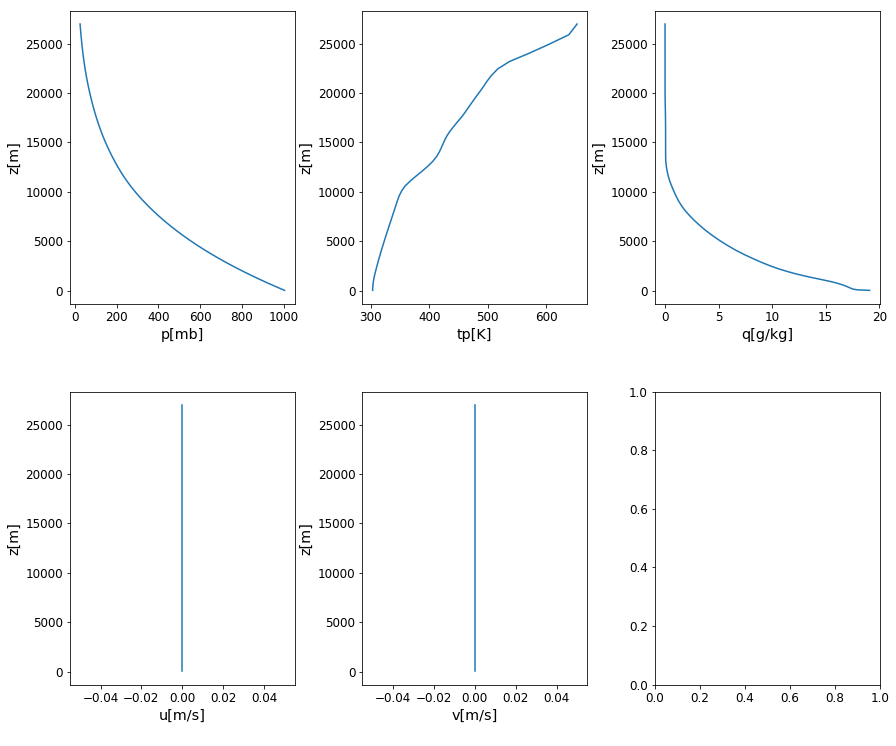

In [8]:
fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(15,12))
for j in range(1,6):
    ifig = np.unravel_index(j-1,(2,3))
    ax[ifig].plot(sounding_all[:,j],sounding_all[:,0])
    ax[ifig].set_xlabel(sounding_varname[j])
    ax[ifig].set_ylabel(sounding_varname[0])
plt.show()

# Create sounding file

In [15]:
modeldir = getModelDir()
sounding_file = os.path.join(modeldir,case,'snd_spunup_TKE-SST%d-r%d'%(sst_ref,realiz))

In [16]:
f = open(sounding_file,'w')
f.write(header)
f.write(metadata1)

18

In [17]:
for i in range(len(sounding_all)):
    f.write('   '.join(["%.4f"%(x) for x in sounding_all[i]])+'\n')

In [18]:
f.write(metadata2)

21

In [19]:
for i in range(len(sounding_all)):
    f.write('   '.join(["%.4f"%(x) for x in sounding_all[i]])+'\n')

In [20]:
f.close()